In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptops_10.csv', encoding = '1251')
df.head(5)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


## Задание 1

Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas.
Вывести на экран первые 5 строк.
### 1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib



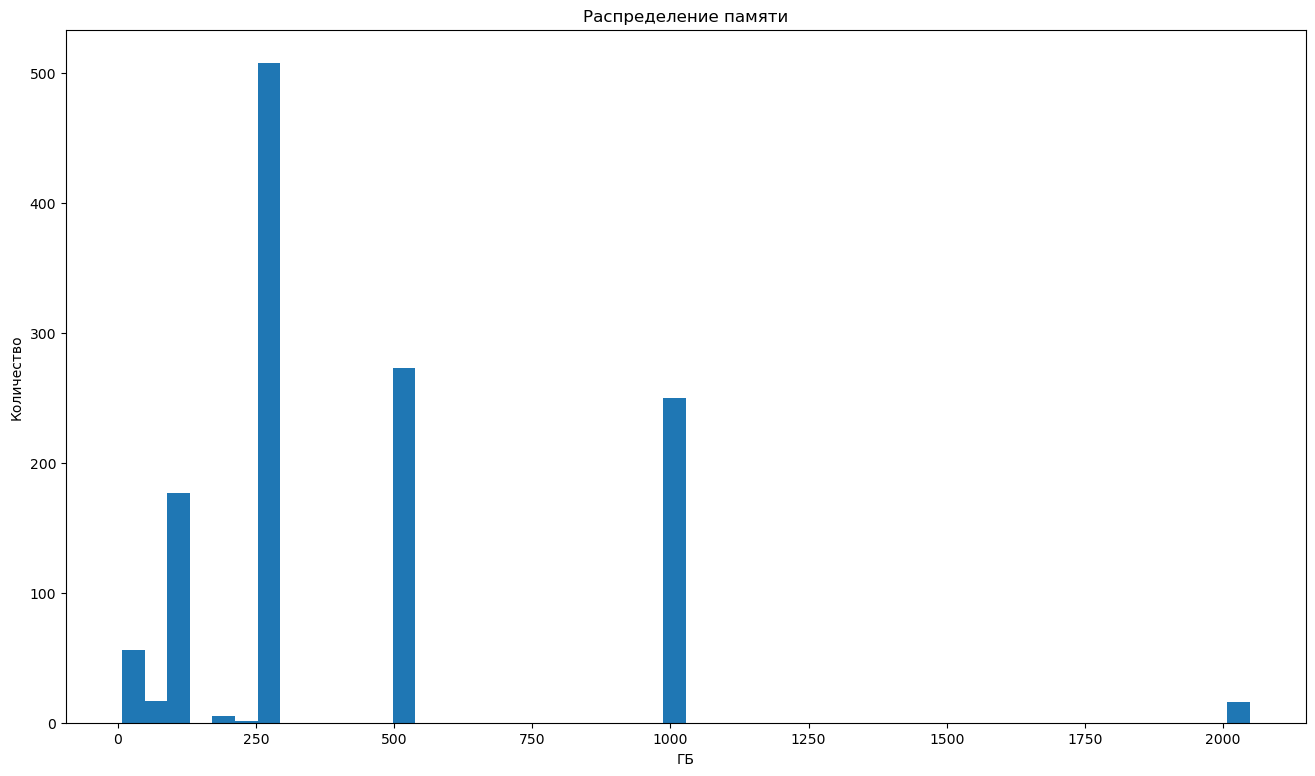

In [4]:
plt.figure(figsize=(16,9))
plt.hist(df['Memory_Amount'], bins=50)
plt.title('Распределение памяти')
plt.xlabel('ГБ')
plt.ylabel('Количество');

Вывод по графику: 256ГБ используется больше всего. Это мода.

### 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib


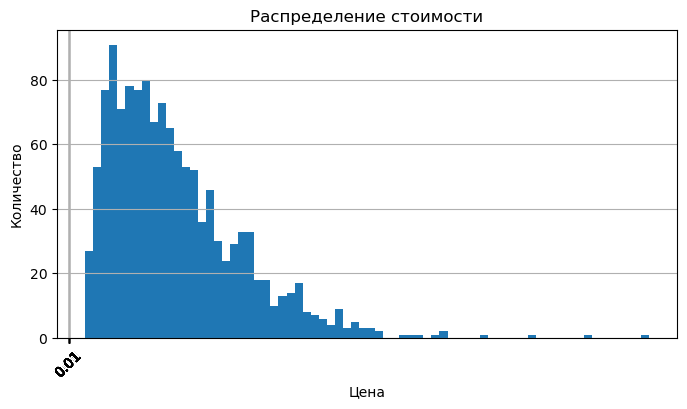

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(df['Price_euros'], bins=70)
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xticks([1 / 100 for i in range(0, 501, 25)], rotation=45)
plt.grid();

### 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы.

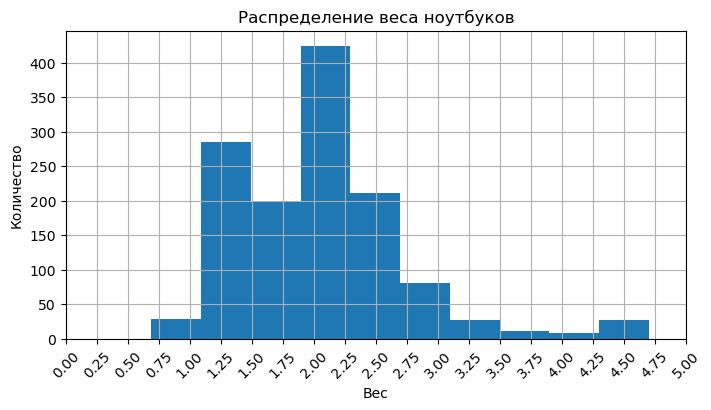

In [6]:
plt.figure(figsize=(8,4))
plt.hist(df['Weight'])
plt.xlabel('Вес')
plt.ylabel('Количество')
plt.title('Распределение веса ноутбуков')
plt.xticks([i / 100 for i in range(0, 501, 25)], rotation=45)
plt.grid();

## Задание 2
Постройте графики. Сделайте выводы.
### 2.1 Изучите распределение типов носителя (Memory_Type)


In [7]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

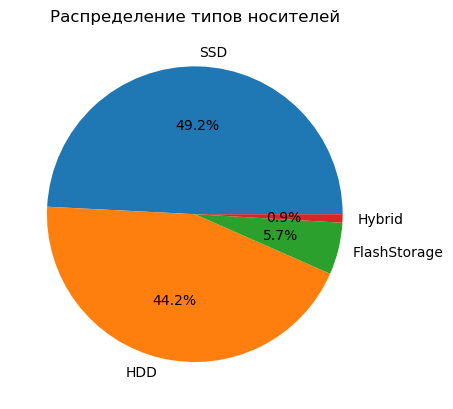

In [8]:
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title('Распределение типов носителей');

In [9]:
data = df['Company'].value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

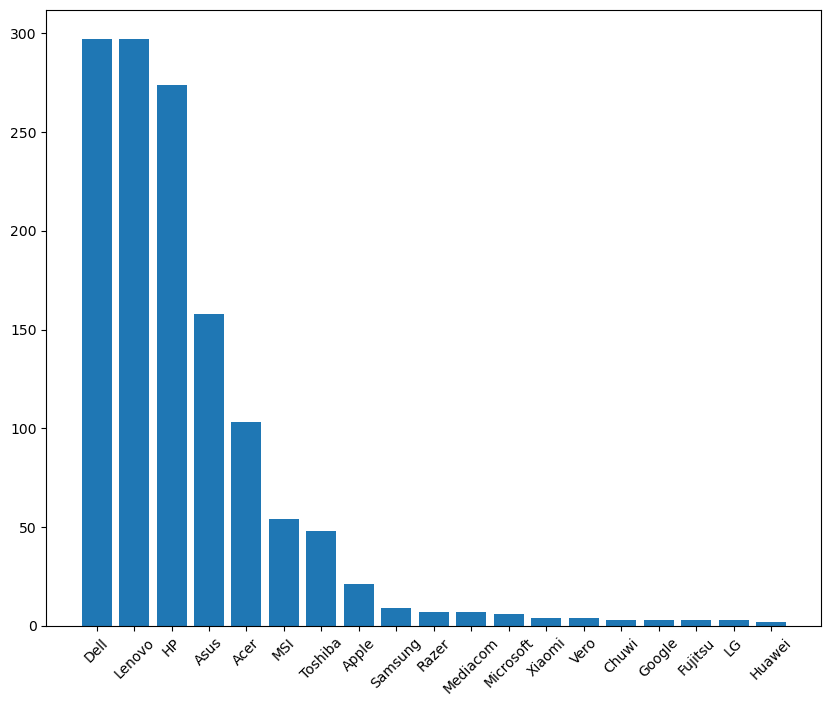

In [10]:
plt.figure(figsize=(10, 8))
plt.bar(data.index, data.values)
plt.xticks(rotation=45);

In [11]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

# https://translated.turbopages.org/proxy_u/en-ru.ru.aecb970c-64bce700-ee3a4e18-74722d776562/https/www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

### 2.3 Изучите распределение операционной системы (OpSys)

### 2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

In [12]:
data = df['Cpu_Company'].value_counts()
data

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

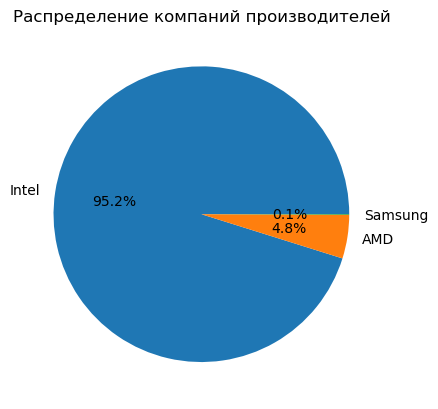

In [13]:
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title('Распределение компаний производителей');

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму.
Процессоры от Samsung не изучайте.

### 3.1 Постройте график в абсолютных величинах


In [14]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [15]:
data = data.reset_index().drop(columns=['Samsung'])
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


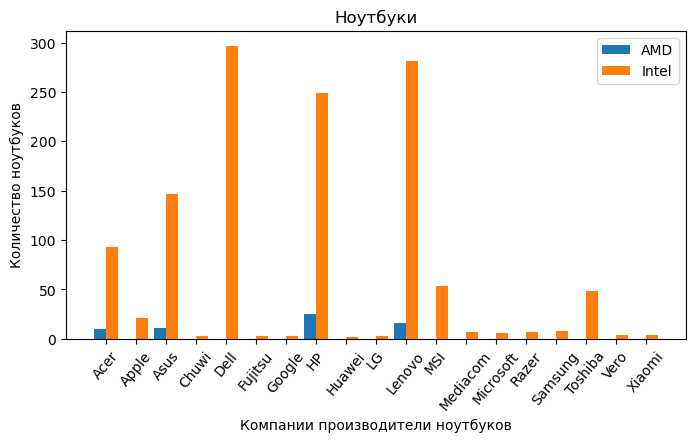

In [16]:
plt.figure(figsize=(8, 4))
n_ticks=np.arange(len(data['AMD']))
offset=0.2
w=0.4
plt.bar(n_ticks-offset, data['AMD'], width=w)
plt.bar(n_ticks+offset, data['Intel'], width=w)
plt.title('Ноутбуки')
plt.xlabel('Компании производители ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=50);



### 3.2 Постройте график в относительных величинах

In [18]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index').reset_index()
data.drop(columns=['Samsung'], inplace=True)
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


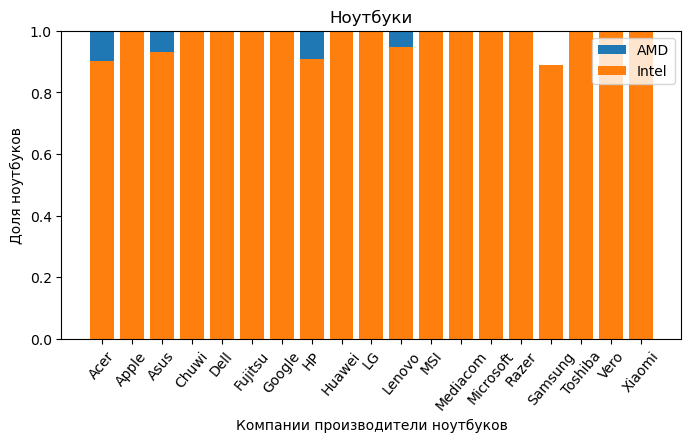

In [21]:
plt.figure(figsize=(8, 4))

plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])
plt.bar(data['Company'], data['Intel'])

plt.title('Ноутбуки')
plt.xlabel('Компании производители ноутбуков')
plt.ylabel('Доля ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=50);